- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Select your target variable and the features
- Split your dataset to training and test sets
- Based on your data exploration phase select a ML classification algorithm and train it on the training set
- Assess your model performance on the test set using relevant evaluation metrics
- Discuss with your cohort alternative ways to improve your model performance

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# import the label Encoder library 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [60]:
df = pd.read_csv("African_crises_dataset - African_crises_dataset.csv")

In [6]:
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
country_number,1059.0,35.613787,23.692402,1.000000,15.000000,38.00000,56.000000,7.000000e+01
year,1059.0,1967.767705,33.530632,1860.000000,1951.000000,1973.00000,1994.000000,2.014000e+03
systemic_crisis,1059.0,0.077432,0.267401,0.000000,0.000000,0.00000,0.000000,1.000000e+00
exch_usd,1059.0,43.140831,111.475380,0.000000,0.195350,0.86840,8.462750,7.443061e+02
domestic_debt_in_default,1059.0,0.039660,0.195251,0.000000,0.000000,0.00000,0.000000,1.000000e+00
sovereign_external_debt_default,1059.0,0.152975,0.360133,0.000000,0.000000,0.00000,0.000000,1.000000e+00
gdp_weighted_default,1059.0,0.006402,0.043572,0.000000,0.000000,0.00000,0.000000,4.000000e-01
inflation_annual_cpi,1059.0,20848.892444,675727.429176,-28.502137,2.086162,5.76233,11.644048,2.198970e+07
independence,1059.0,0.776204,0.416984,0.000000,1.000000,1.00000,1.000000,1.000000e+00
currency_crises,1059.0,0.132200,0.349847,0.000000,0.000000,0.00000,0.000000,2.000000e+00


In [11]:
df["country"].value_counts()

country
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: count, dtype: int64

In [12]:
df["country_number"].value_counts()

country_number
19    155
56    114
70     90
1      85
2      77
40     75
63     75
69     72
38     68
35     67
15     63
45     60
10     58
Name: count, dtype: int64

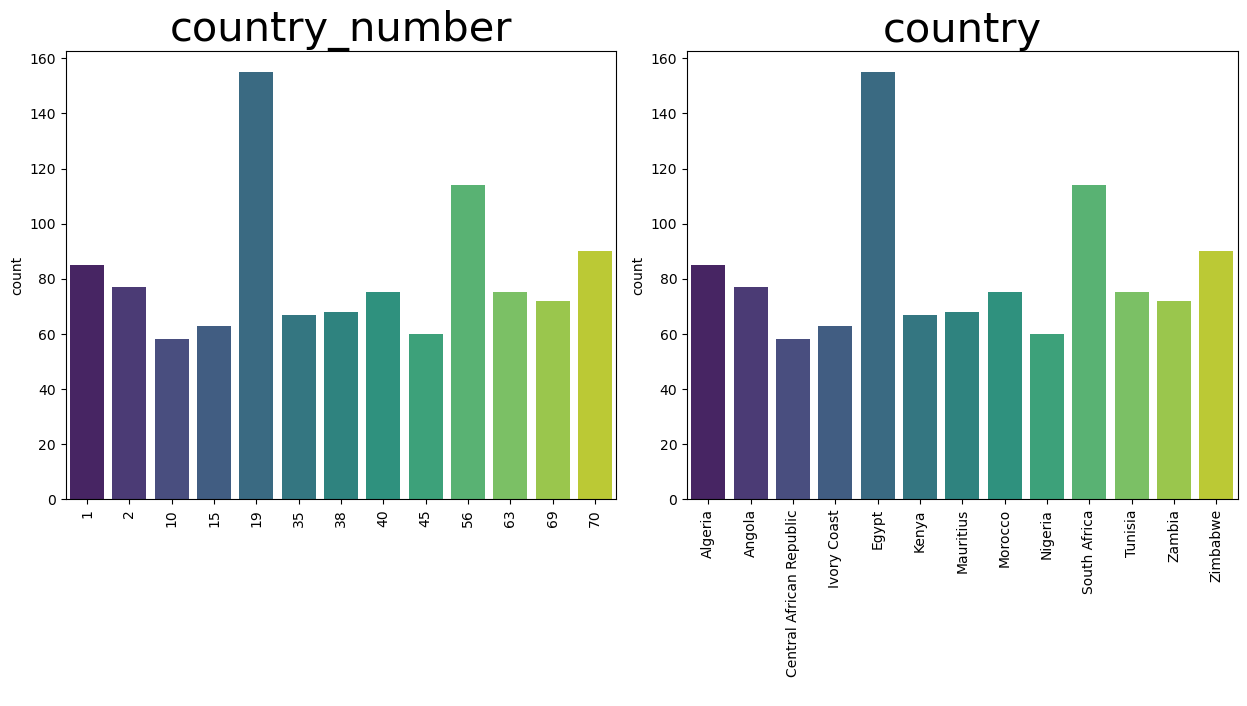

In [61]:
categorical_features = ["country_number", "country"]
plt.figure(figsize=(25, 25))
for i in range(0, len(categorical_features)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x = df[categorical_features[i]], palette = 'viridis')
    plt.title(categorical_features[i], fontsize = 30)
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [62]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

Index(['country_number', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises'],
      dtype='object')

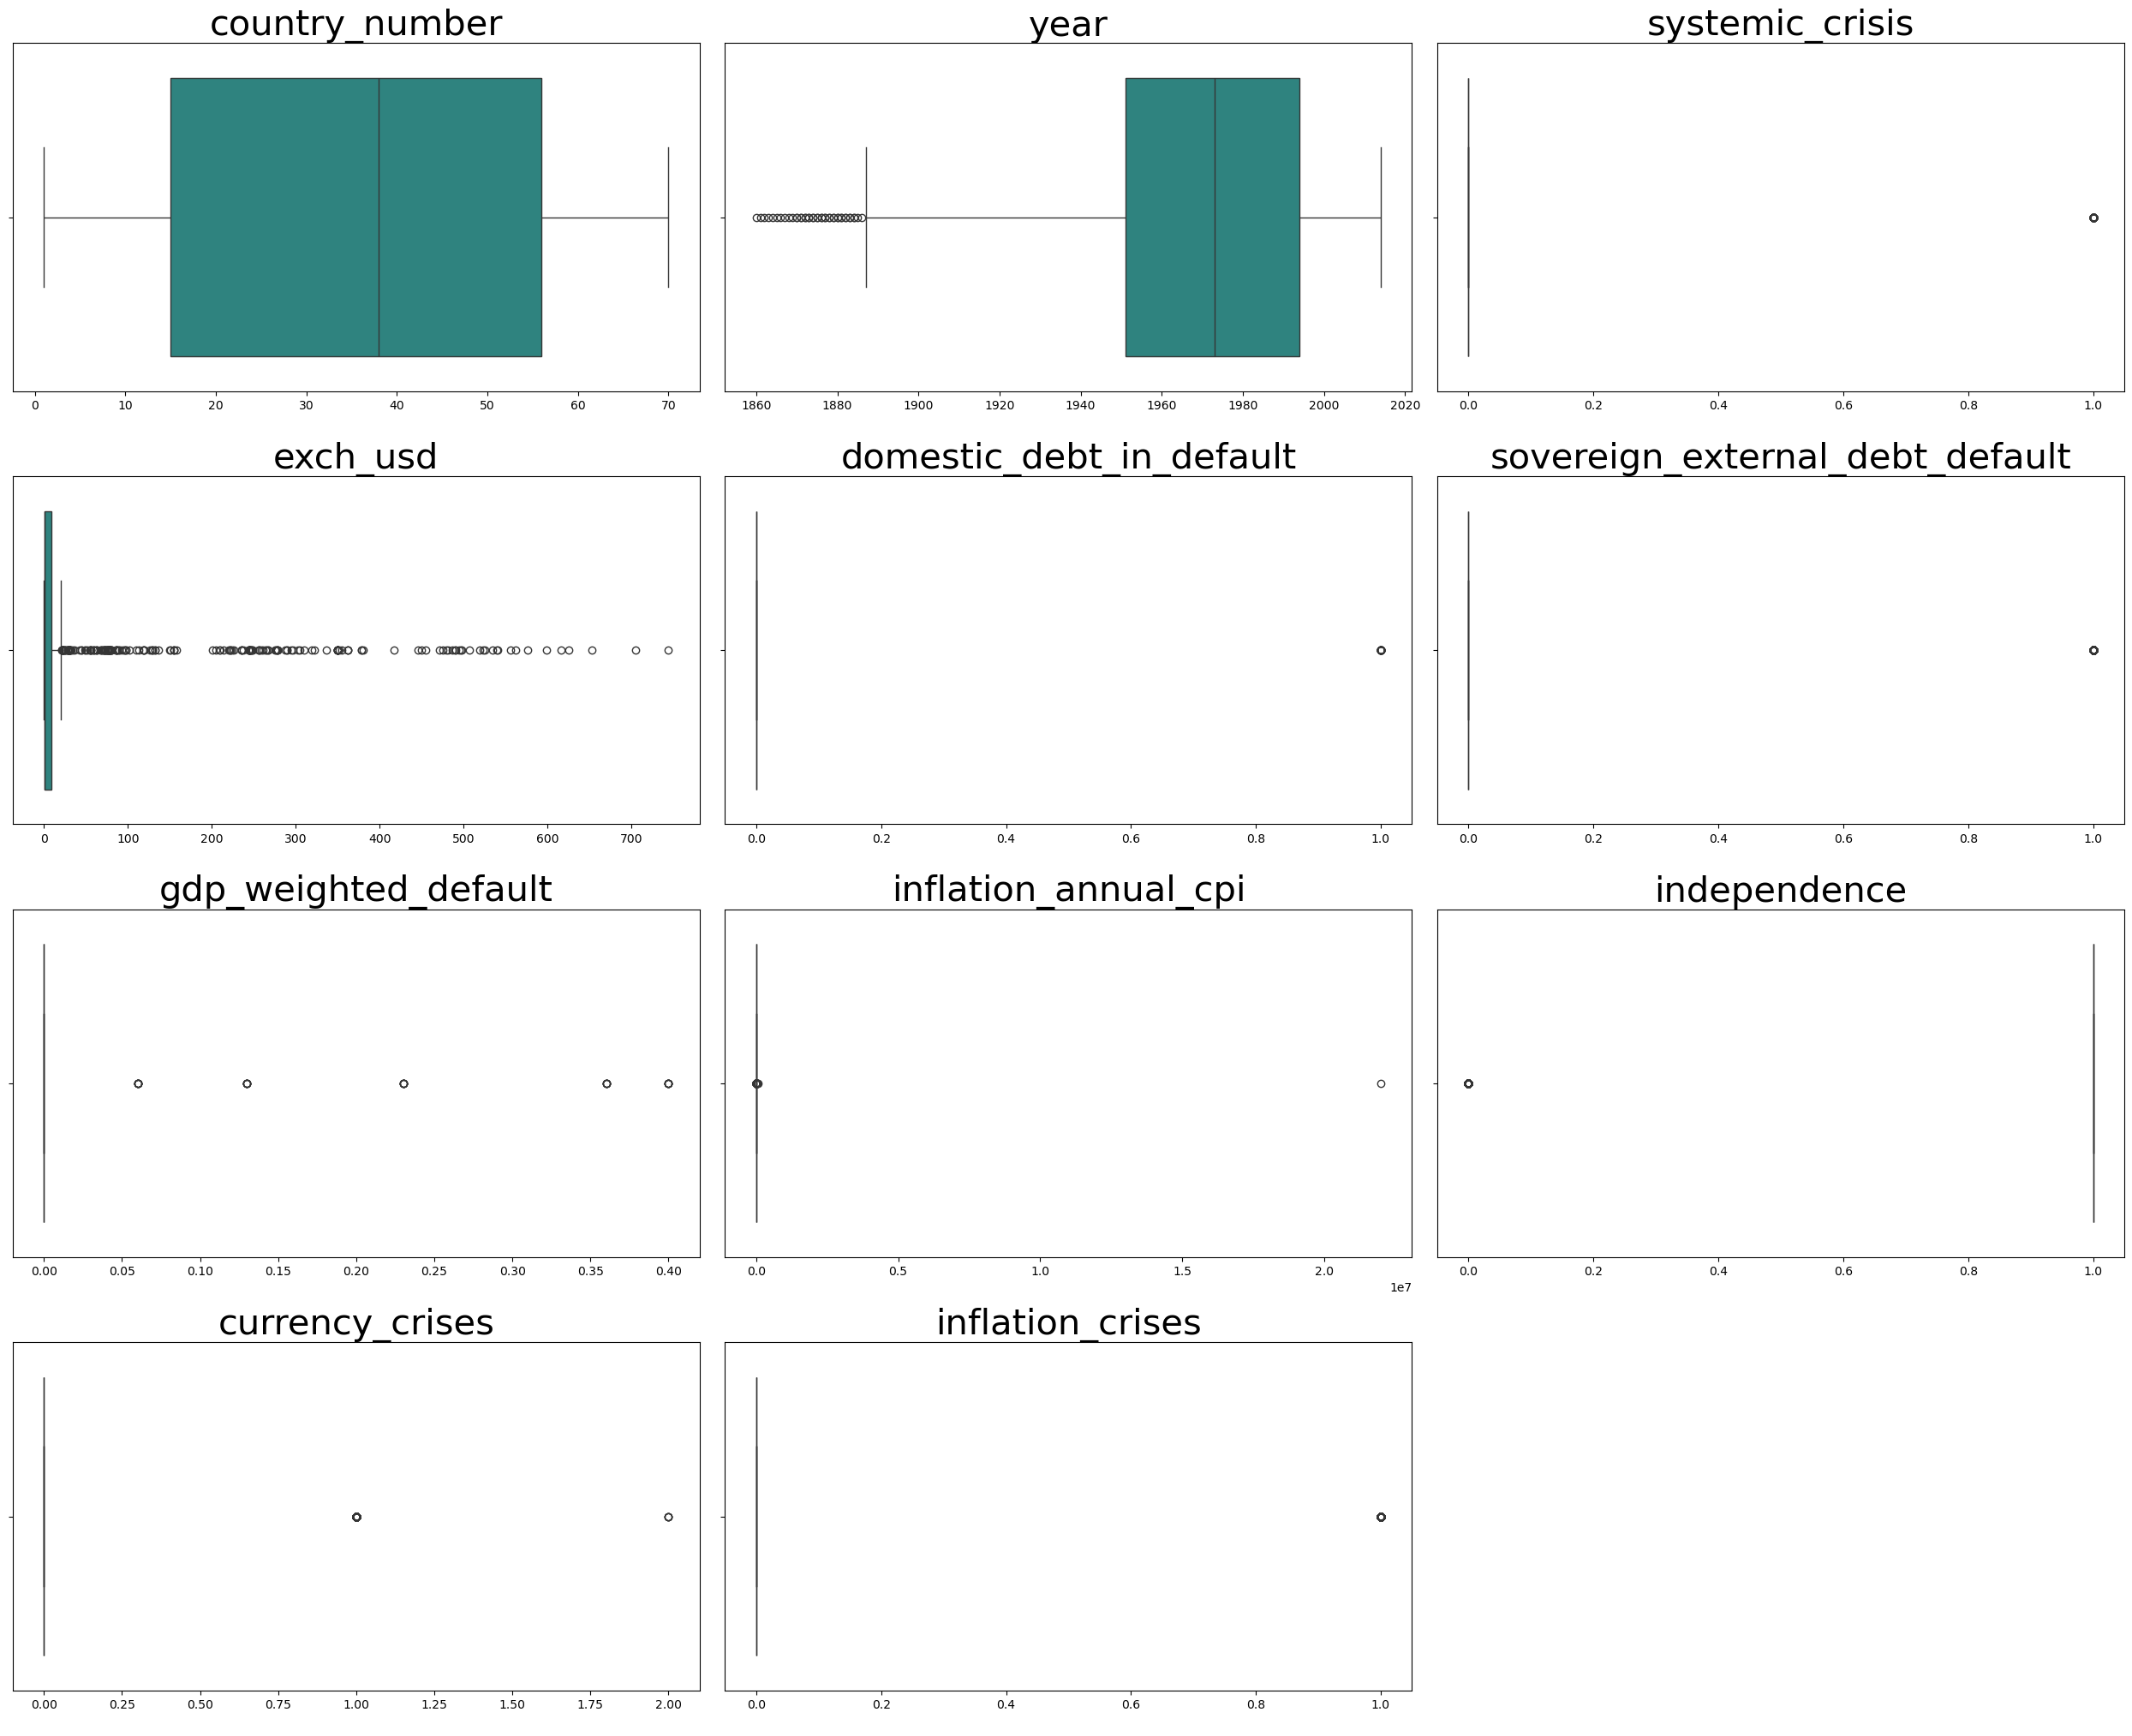

In [31]:
plt.figure(figsize=(25, 25))
for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = df[numerical_features[i]], palette = 'viridis')
    plt.title(numerical_features[i], fontsize = 30)
    plt.xlabel(' ')
    plt.tight_layout()

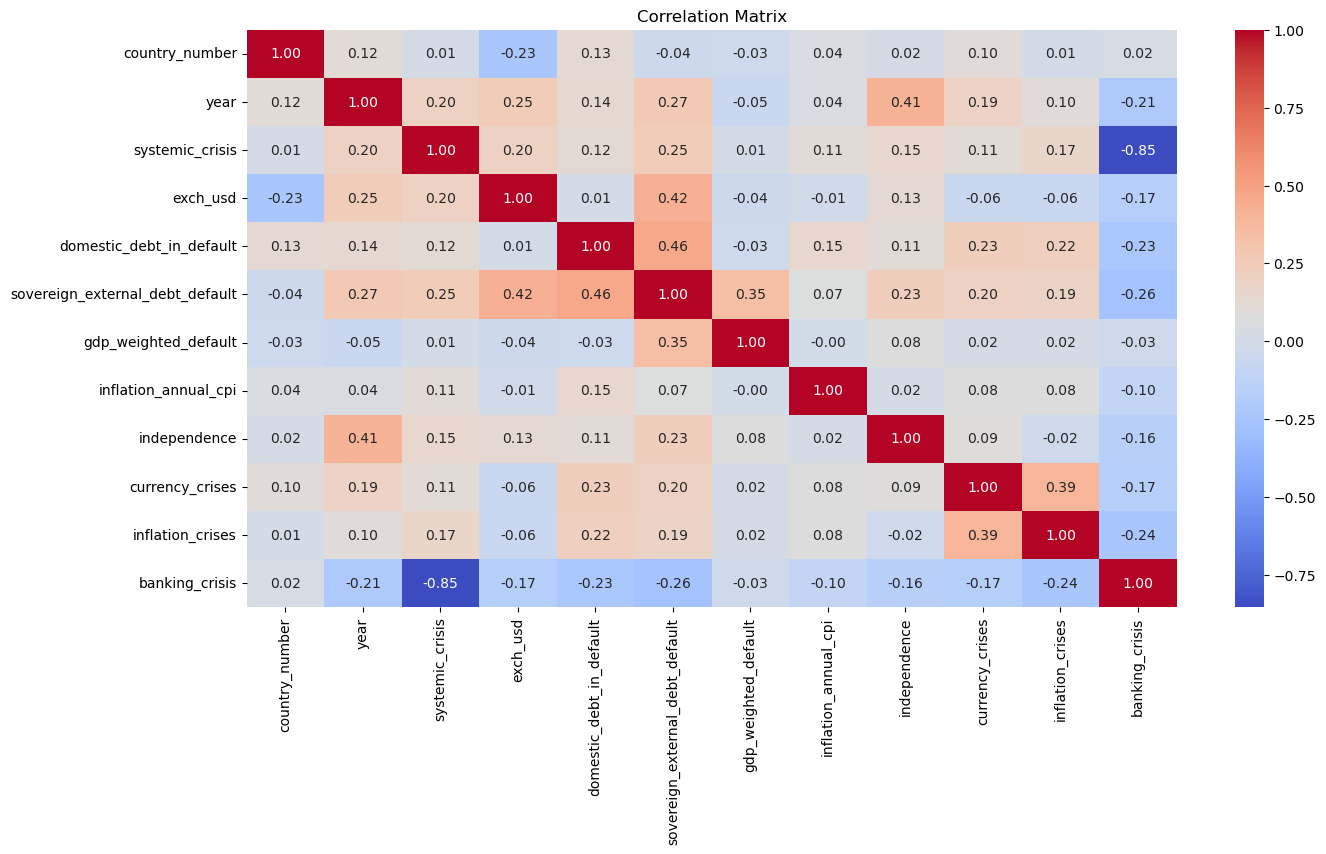

In [70]:
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [67]:
df["banking_crisis"] = label_encoder.fit_transform(df["banking_crisis"])

In [68]:
df["systemic_crisis"].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       0
4       0
       ..
1054    1
1055    0
1056    0
1057    0
1058    0
Name: systemic_crisis, Length: 1059, dtype: int64>

In [69]:
numerical_features = df.select_dtypes(include='number').columns
correlation = df[numerical_features].corr().apply(abs)
correlation = correlation[['banking_crisis']].sort_values(['banking_crisis'], ascending=False)
correlation

# Set a threshold for low correlation (e.g., absolute correlation < 0.1)
threshold = 0.2

# Filter the column names that have an absolute correlation with SalePrice below the threshold
low_corr_columns = correlation[correlation['banking_crisis']< threshold].index.tolist()

# Print the list of columns with low correlation
print(f"Columns with correlation less than {threshold}:\n", low_corr_columns)

Columns with correlation less than 0.2:
 ['exch_usd', 'currency_crises', 'independence', 'inflation_annual_cpi', 'gdp_weighted_default', 'country_number']


In [ ]:
df = df.drop(columns=low_corr_columns)

In [71]:
df = df.drop("country_code", axis=1)

In [76]:
df.head()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,...,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,...,False,False,False,False,False,False,False,False,False,False


In [73]:
df = df.join(pd.get_dummies(df.country))
df = df.drop("country", axis=1)

In [82]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = df.drop("currency_crises", axis=1), df["currency_crises"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:

import xgboost

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for the features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_test_preds)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_preds)

# Calculate classification report
class_report_xgb = classification_report(y_test, y_test_preds)

# Print the metrics
print(f"xgboost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)

xgboost:
Accuracy: 0.8868
Confusion Matrix:
[[133   5]
 [ 13   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       138
           1       0.62      0.38      0.47        21

    accuracy                           0.89       159
   macro avg       0.76      0.67      0.70       159
weighted avg       0.87      0.89      0.88       159



In [84]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the SVC model
svc_reg = SVC(kernel='rbf')

# Fit the model to the training data
svc_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svc = svc_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Calculate confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Calculate classification report
class_report_svc = classification_report(y_test, y_pred_svc)

# Print the metrics
print(f"Support Vector Classification:")
print(f"Accuracy: {accuracy_svc:.4f}")
print("Confusion Matrix:")
print(conf_matrix_svc)
print("Classification Report:")
print(class_report_svc)

Support Vector Classification:
Accuracy: 0.8805
Confusion Matrix:
[[135   3]
 [ 16   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       138
           1       0.62      0.24      0.34        21

    accuracy                           0.88       159
   macro avg       0.76      0.61      0.64       159
weighted avg       0.86      0.88      0.86       159



In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Fit the model to the training data
gb_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gb = gb_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Calculate classification report
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the metrics
print(f"Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)

Gradient Boosting Classifier:
Accuracy: 0.8679
Confusion Matrix:
[[131   7]
 [ 14   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       138
           1       0.50      0.33      0.40        21

    accuracy                           0.87       159
   macro avg       0.70      0.64      0.66       159
weighted avg       0.85      0.87      0.86       159



In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate classification report
class_report_knn = classification_report(y_test, y_pred_knn)

# Print the metrics
print(f"K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)

K-Nearest Neighbors Classifier:
Accuracy: 0.8868
Confusion Matrix:
[[135   3]
 [ 15   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       138
           1       0.67      0.29      0.40        21

    accuracy                           0.89       159
   macro avg       0.78      0.63      0.67       159
weighted avg       0.87      0.89      0.87       159



In [87]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
forest_clf = RandomForestClassifier()

# Fit the model to the training data
forest_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_forest = forest_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# Calculate confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Calculate classification report
class_report_forest = classification_report(y_test, y_pred_forest)

# Print the metrics
print(f"Random Forest Classifier:")
print(f"Accuracy: {accuracy_forest:.4f}")
print("Confusion Matrix:")
print(conf_matrix_forest)
print("Classification Report:")
print(class_report_forest)

Random Forest Classifier:
Accuracy: 0.8679
Confusion Matrix:
[[133   5]
 [ 16   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       138
           1       0.50      0.24      0.32        21

    accuracy                           0.87       159
   macro avg       0.70      0.60      0.62       159
weighted avg       0.84      0.87      0.85       159



In [88]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

# Fit the model to the training data
tree_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_tree = tree_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Calculate classification report
class_report_tree = classification_report(y_test, y_pred_tree)

# Print the metrics
print(f"Decision Tree Classifier:")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tree)
print("Classification Report:")
print(class_report_tree)

Decision Tree Classifier:
Accuracy: 0.8491
Confusion Matrix:
[[128  10]
 [ 14   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       138
           1       0.41      0.33      0.37        21

    accuracy                           0.85       159
   macro avg       0.66      0.63      0.64       159
weighted avg       0.84      0.85      0.84       159



In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log = log_reg.predict(X_test_scaled)

# Predict on the training data (for train evaluation)
y_train_pred_log = log_reg.predict(X_train_scaled)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

# Calculate confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Calculate classification report
class_report_log = classification_report(y_test, y_pred_log)

# Print the metrics
print(f"Logistic Regression:")
print(f"Accuracy: {accuracy_log:.4f}")
print("Confusion Matrix:")
print(conf_matrix_log)
print("Classification Report:")
print(class_report_log)

Logistic Regression:
Accuracy: 0.8805
Confusion Matrix:
[[132   6]
 [ 13   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       138
           1       0.57      0.38      0.46        21

    accuracy                           0.88       159
   macro avg       0.74      0.67      0.70       159
weighted avg       0.87      0.88      0.87       159



In [90]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost = AdaBoostClassifier()

Adaboost.fit(X_train, y_train)

y_pred_Ada = Adaboost.predict(X_test)

# Calculate accuracy
accuracy_Adaboost= accuracy_score(y_test, y_pred_Ada)

# Calculate confusion matrix
conf_matrix_Adaboost= confusion_matrix(y_test, y_pred_Ada)

# Calculate classification report
class_report_Adaboost = classification_report(y_test, y_pred_Ada)

# Print the metrics
print(f"Adaboost Classifier:")
print(f"Accuracy: {accuracy_Adaboost:.4f}")
print("Confusion Matrix:")
print(conf_matrix_Adaboost)
print("Classification Report:")
print(class_report_Adaboost)

Adaboost Classifier:
Accuracy: 0.6792
Confusion Matrix:
[[91 47]
 [ 4 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       138
           1       0.27      0.81      0.40        21

    accuracy                           0.68       159
   macro avg       0.61      0.73      0.59       159
weighted avg       0.87      0.68      0.73       159

